In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()    # load mnist data
x_train, x_test = x_train / 255.0, x_test / 255.0
tf.shape(x_train)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28])>

## Dataset split

train dataset에 60000개 데이터가 있으므로, 랜덤하게 split하여 3만개의 학습데이터만 사용

In [3]:
import random

rand_selected = random.sample([x for x in range(0, len(x_train))], 30000)
x_train = x_train[rand_selected]
y_train = y_train[rand_selected]

print(f"shape of x_train is {tf.shape(x_train)}")
print(f"shape of y_train is {tf.shape(y_train)}")
print(f"shape of x_test is {tf.shape(x_test)}")
print(f"shape of y_test is {tf.shape(y_test)}")

shape of x_train is [30000    28    28]
shape of y_train is [30000]
shape of x_test is [10000    28    28]
shape of y_test is [10000]


## Generate Shifted image - data enhancing

In [4]:
from scipy.ndimage.interpolation import shift

x_enhanced = list(x_train)
y_enhanced = list(y_train)

shifting_list = [
    [0, 1],
    [1, 0], 
    [-1, 0],
    [0, -1]
]

for x_shift, y_shift in shifting_list:
     for image, label in zip(x_train, y_train):
            shifted_image = shift(image, [y_shift, x_shift])
            shifted_image.reshape([-1])
            x_enhanced.append(shifted_image)
            y_enhanced.append(label)

rand_selected = random.sample([x for x in range(0, len(x_enhanced))], len(x_enhanced))
x_train = np.array(x_enhanced)[rand_selected]
y_train = np.array(y_enhanced)[rand_selected]

print(f"shape of x_train is {tf.shape(x_train)}")
print(f"shape of y_train is {tf.shape(y_train)}")

shape of x_train is [150000     28     28]
shape of y_train is [150000]


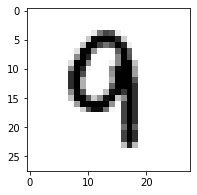

9

In [5]:
plt.figure(figsize=(3, 3))
train_img = np.reshape(x_enhanced[-1], [28, 28])
plt.imshow(train_img, cmap='Greys')
plt.show()

y_enhanced[-1]

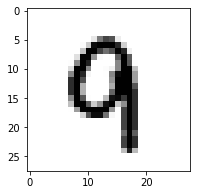

9

In [6]:
plt.figure(figsize=(3, 3))
train_img = np.reshape(x_enhanced[29999], [28, 28])
plt.imshow(train_img, cmap='Greys')
plt.show()

y_enhanced[-1]

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(786, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(786, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(0.0005)
los = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt,
              loss=los,
              metrics=['accuracy'])


In [8]:
tf.device('/device:GPU:0')
model.fit(x_train, y_train, epochs=300, batch_size=100)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/300
1500/1500 [==============================] - 15s 9ms/step - loss: 0.1978 - accuracy: 0.9426
Epoch 2/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0760 - accuracy: 0.9790
Epoch 3/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0511 - accuracy: 0.9857
Epoch 4/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0419 - accuracy: 0.9887
Epoch 5/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0318 - accuracy: 0.9914
Epoch 6/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0269 - accuracy: 0.9925
Epoch 7/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0255 - accuracy: 0.9934
Epoch 8/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0235 - accuracy: 0.9942
Epoch 9/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0204 - accuracy: 0.9949
Epoch 10/300
1500/1500 [==============================] - 13s 9m

[1.59763765335083, 0.9865000247955322]

In [13]:
model.save_weights('./model1_weight/')